In [27]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("zestawy danych","mieszkania")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [28]:
fetch_housing_data()

In [29]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    

In [30]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeaf72c080>,
      dtype=object)

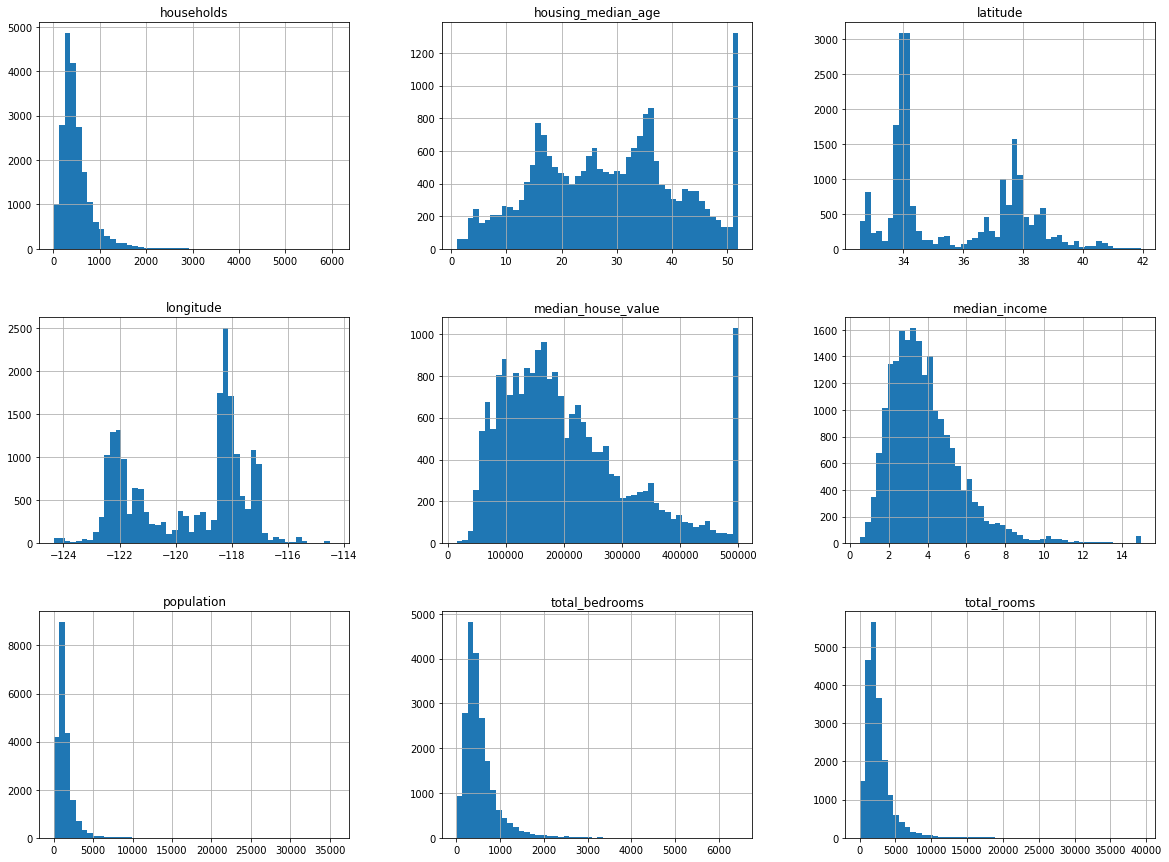

In [31]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20,15))

In [32]:
import hashlib 
import numpy as np

def test_set_check(identifier, test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data,test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

train_set.head()
print()
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
4       4    -122.25     37.85                52.0       1627.0   
5       5    -122.25     37.85                52.0        919.0   
11     11    -122.26     37.85                52.0       3503.0   
20     20    -122.27     37.85                40.0        751.0   
23     23    -122.27     37.84                52.0       1688.0   

    total_bedrooms  population  households  median_income  median_house_value  \
4            280.0       565.0       259.0         3.8462            342200.0   
5            213.0       413.0       193.0         4.0368            269700.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
20           184.0       409.0       166.0         1.3578            147500.0   
23           337.0       853.0       325.0         2.1806             99700.0   

   ocean_proximity  
4         NEAR BAY  
5         NEAR BAY  
11        NEAR BAY  
20        NEAR BAY  
23        NEAR BAY

In [33]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split  = StratifiedShuffleSplit(n_splits=1,test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set  = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
housing["income_cat"].value_counts()

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [34]:
housing = strat_train_set.copy()

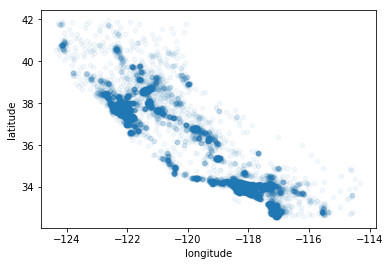

In [35]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.05)

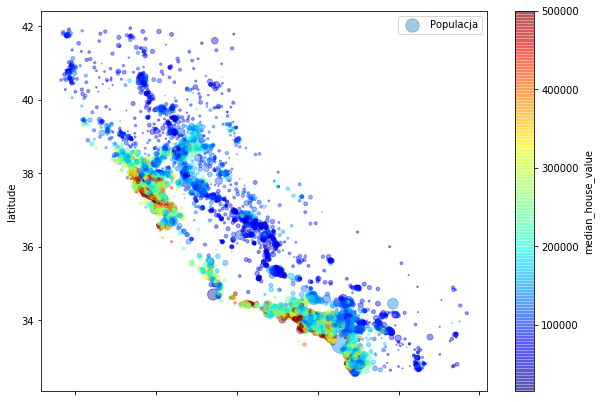

In [36]:
housing.describe()
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "Populacja", figsize = (10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [37]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeaed8bcf8>,
      dtype=object)

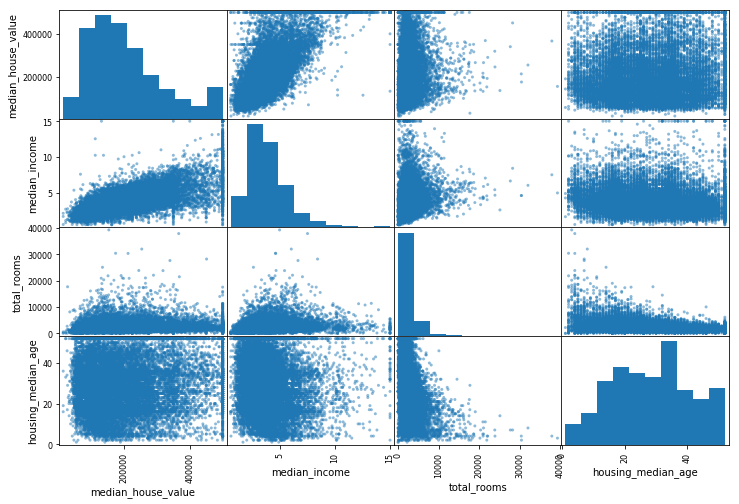

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12,8))

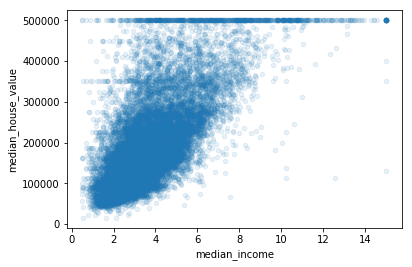

In [39]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [40]:
housing["Pokoje_na_rodzine"]= housing["total_rooms"]/housing["households"]
housing["Sypialnie_na_pokoje"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["Populacja_na_rodzine"]=housing["population"]/housing["households"]

In [45]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687160
Pokoje_na_rodzine       0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
Populacja_na_rodzine   -0.021985
population             -0.026920
longitude              -0.047432
latitude               -0.142724
Sypialnie_na_pokoje    -0.259984
Name: median_house_value, dtype: float64

In [46]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy

In [49]:
housing.drop("total_bedrooms",axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
17606    -121.89     37.29                38.0       1568.0       710.0   
18632    -121.93     37.05                14.0        679.0       306.0   
14650    -117.20     32.77                31.0       1952.0       936.0   
3230     -119.61     36.31                25.0       1847.0      1460.0   
3555     -118.59     34.23                17.0       6592.0      4459.0   
19480    -120.97     37.66                24.0       2930.0      1448.0   
8879     -118.50     34.04                52.0       2233.0       769.0   
13685    -117.24     34.15                26.0       2041.0       936.0   
4937     -118.26     33.99                47.0       1865.0      1916.0   
4861     -118.28     34.02                29.0        515.0      2690.0   
16365    -121.31     38.02                24.0       4157.0      2734.0   
19684    -121.62     39.14                41.0       2183.0      1202.0   
19234    -122.69     38.51                18.0       3364.0      1442.0   
13956    -117.06     34.17                21.0       2520.0       416.0   
2390     -119.46     36.91                12.0       2980.0      1184.0   
11176    -117.96     33.83                30.0       2838.0      1758.0   
15614    -122.41     37.81                25.0       1178.0       592.0   
2953     -119.02     35.35                42.0       1239.0       776.0   
13209    -117.72     34.05                 8.0       1841.0      1243.0   
6569     -118.15     34.20                46.0       1505.0       857.0   
5825     -118.30     34.19                14.0       3615.0      1924.0   
18086    -122.05     37.31                25.0       4111.0      1585.0   
16718    -120.66     35.49                17.0       4422.0      2307.0   
13600    -117.25     34.16                37.0       1709.0       744.0   
13989    -117.19     34.94                31.0       2034.0      1097.0   
15168    -117.06     33.02                24.0        830.0       279.0   
6747     -118.07     34.11                41.0       2869.0      1627.0   
7398     -118.24     33.96                44.0       1338.0      1765.0   
5562     -118.28     33.91                41.0        620.0       642.0   
16121    -122.46     37.79                52.0       2059.0       999.0   
...          ...       ...                 ...          ...         ...   
12380    -116.47     33.77                26.0       4300.0      1557.0   
5618     -118.23     33.78                20.0         59.0        69.0   
10060    -121.06     39.25                17.0       3127.0      1390.0   
18067    -122.03     37.29                22.0       3118.0      1147.0   
4471     -118.17     34.09                33.0       2907.0      3212.0   
19786    -122.86     40.56                12.0       1350.0       423.0   
9969     -122.48     38.51                49.0       1977.0       741.0   
14621    -117.17     32.78                17.0       3845.0      3102.0   
579      -122.07     37.71                40.0       1808.0       746.0   
11682    -118.01     33.87                25.0       6348.0      4188.0   
245      -122.21     37.78                43.0       1702.0      1227.0   
12130    -117.23     33.94                 8.0       2405.0      1594.0   
16441    -121.29     38.14                34.0       2770.0      1409.0   
11016    -117.82     33.76                33.0       2774.0      1229.0   
19934    -119.34     36.31                14.0       1635.0       870.0   
1364     -122.14     38.03                42.0        118.0        54.0   
1236     -120.37     38.23                13.0       4401.0       924.0   
5364     -118.42     34.04                52.0       1358.0       574.0   
11703    -117.97     33.88                16.0       2003.0      1172.0   
10356    -117.67     33.60                25.0       3164.0      1517.0   
15270    -117.29     33.08                18.0       3225.0      1463.0   
3754     -118.37     34.18      

In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns = housing_num.columns)